# Airbnb Data Analysis Project
### by Denver Cowan

## Data Sourced from: http://insideairbnb.com/get-the-data/
## Brief Description of what each file in the data contains
 ###  - Listings.csv: Summary information and metrics for listings in Asheville, NC
 ### - reviews.csv: Review dates and Listing ID
 ### - neighbourhoods.csv: Neighbourhood list

In [1]:
# Just importing some standard data science libraries that I know I will use
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Let's get a preview of the listings dataset so we can see what we're 
# working with.
listings_df = pd.read_csv("listings.csv", index_col="id")
# below is just transitioning from UK spelling to US spelling.
listings_df.rename(columns={"neighbourhood":"neighborhood"}, inplace=True)
listings_df.head()

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,100,30,92,2022-12-11,0.66,2,246,2,NaN
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,100,1,383,2023-03-12,2.70,6,197,26,NaN
156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57864,-82.59578,Private room,66,1,67,2020-01-01,0.48,6,0,0,NaN
197263,Tranquil Room & Private Bath,961396,Timo,NaN,28806,35.57808,-82.63689,Private room,45,2,66,2022-11-21,0.51,2,88,24,NaN
209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,100,30,60,2022-10-31,0.43,1,231,2,NaN


In [3]:
# let's get some general info about our dataset
listings_df.describe()

,host_id,neighbourhood_group,neighborhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,3.161000e+03,0.0,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,2918.000000,3161.000000,3161.000000,3161.000000,0.0
mean,1.427008e+08,NaN,28792.496362,35.576571,-82.558173,175.025941,5.197722,95.489402,2.596542,8.674154,204.468206,23.746916,NaN
std,1.404253e+08,NaN,30.506506,0.049050,0.047981,187.788697,10.503005,125.547268,2.160669,22.411573,118.527579,25.702765,NaN
min,1.504900e+04,NaN,28704.000000,35.422810,-82.691050,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.574990e+07,NaN,28801.000000,35.561020,-82.592430,92.000000,1.000000,10.000000,0.990000,1.000000,95.000000,3.000000,NaN
50%,9.630593e+07,NaN,28804.000000,35.587510,-82.557380,130.000000,2.000000,48.000000,2.070000,2.000000,224.000000,16.000000,NaN
75%,2.066904e+08,NaN,28806.000000,35.606120,-82.521950,204.000000,2.000000,134.000000,3.620000,4.000000,316.000000,36.000000,NaN
max,5.048949e+08,NaN,28806.000000,35.656090,-82.459420,6588.000000,180.000000,1156.000000,14.660000,115.000000,365.000000,181.000000,NaN


In [4]:
# The first question I would like to answer is what neighborhood
# commands the highest average listing price
n_hood_prices = listings_df.groupby("neighborhood")["price"].mean().reset_index(name="average_price")
n_hood_prices

,neighborhood,average_price
0,28704,161.627273
1,28715,157.086957
2,28732,193.148148
3,28801,218.272459
4,28803,163.304740
5,28804,186.111639
6,28805,170.648562
7,28806,148.338816


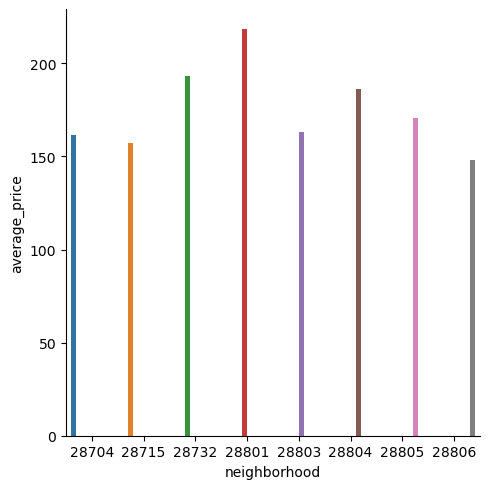

In [5]:
# Now that we have the answer to that question let's visualize it. 
sns.catplot(data=n_hood_prices, x="neighborhood", y="average_price", hue="neighborhood", kind="bar")

In [6]:
# just ordering and displaying the three most expensive neighborhoods in order
top_prices = n_hood_prices[n_hood_prices > 186].dropna().reset_index(drop=True)
top_prices = top_prices.sort_values("average_price").reset_index(drop=True)[::-1].reset_index(drop=True)
top_prices

,neighborhood,average_price
0,28801,218.272459
1,28732,193.148148
2,28804,186.111639


In [7]:
# now that we know the best areas to own an Airbnb in let's save that data in a dataframe of its own, from there we 
# can try to extrapolate more interesting facts and see if some commonalities exist.
best_areas = listings_df[listings_df.neighborhood.isin([28801,28732,28804])]
best_areas.head()

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,100,30,92,2022-12-11,0.66,2,246,2,NaN
209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.618560,-82.552760,Entire home/apt,100,30,60,2022-10-31,0.43,1,231,2,NaN
304379,Refocus Cottage - paradise,1566145,Gayle,NaN,28804,35.644530,-82.525860,Entire home/apt,289,30,24,2019-08-03,0.18,2,243,0,NaN
436476,"8 min Walk to DT AVL! Hip, Chic % Sparkling CLEAN",478398,Heidi,NaN,28801,35.601820,-82.561740,Entire home/apt,115,2,364,2023-01-14,2.77,3,68,23,NaN
498089,Urban Getaway One Bedroom Apartment Walk Downtown,2164379,Anne Marie,NaN,28801,35.612255,-82.542885,Entire home/apt,119,30,134,2022-01-31,1.02,1,177,0,NaN


In [8]:
# Next I'd like to see what room_type is most common among the airbnb's in the best areas.
best_areas.groupby("room_type").count()
# from this we can infer that Hotels and Shared rooms can be dropped from our best areas dataset and likely have
# a negligible effect

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
room_type,,,,,,,,,,,,,,,,
Entire home/apt,1001,1001,1001,0,1001,1001,1001,1001,1001,1001,924,924,1001,1001,1001,0
Hotel room,14,14,14,0,14,14,14,14,14,14,10,10,14,14,14,0
Private room,162,162,162,0,162,162,162,162,162,162,130,130,162,162,162,0
Shared room,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4,0


In [9]:
# so let's drop it here
best_areas = best_areas[best_areas.room_type.isin(["Entire home/apt", "Private room"])]
# verification it worked.
best_areas.groupby("room_type").count()

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
room_type,,,,,,,,,,,,,,,,
Entire home/apt,1001,1001,1001,0,1001,1001,1001,1001,1001,1001,924,924,1001,1001,1001,0
Private room,162,162,162,0,162,162,162,162,162,162,130,130,162,162,162,0


In [10]:
# Since listed price does not necesarrily imply highest earning, let's use reviews_per_month as a measure of frequency
# and try to calculate the earnings of each of our Airbnb's in our best_areas dataset as well as our initial dataset.
best_areas.head()

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,100,30,92,2022-12-11,0.66,2,246,2,NaN
209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.618560,-82.552760,Entire home/apt,100,30,60,2022-10-31,0.43,1,231,2,NaN
304379,Refocus Cottage - paradise,1566145,Gayle,NaN,28804,35.644530,-82.525860,Entire home/apt,289,30,24,2019-08-03,0.18,2,243,0,NaN
436476,"8 min Walk to DT AVL! Hip, Chic % Sparkling CLEAN",478398,Heidi,NaN,28801,35.601820,-82.561740,Entire home/apt,115,2,364,2023-01-14,2.77,3,68,23,NaN
498089,Urban Getaway One Bedroom Apartment Walk Downtown,2164379,Anne Marie,NaN,28801,35.612255,-82.542885,Entire home/apt,119,30,134,2022-01-31,1.02,1,177,0,NaN


In [11]:
earnings = listings_df["price"] * listings_df["reviews_per_month"] * 12
earnings = earnings.dropna()
earnings = earnings.reset_index(name="earnings")
earnings = earnings.sort_values("earnings")[::-1]
earnings.head()

,id,earnings
911,28986868,239539.68
1097,33521140,53869.20
1228,36958278,43070.52
965,30232435,37462.92
2185,53092220,37043.16


In [12]:
# let's have a look at our top earner. And see if we notice anything that stands out. 
listings_df.loc[28986868]

name                              Retro Apartment- Trailer  5 min to Downtown Ash
host_id                                                                 176087087
host_name                                                                   Danny
neighbourhood_group                                                           NaN
neighborhood                                                                28806
latitude                                                                 35.59779
longitude                                                                -82.6217
room_type                                                         Entire home/apt
price                                                                        6588
minimum_nights                                                                  1
number_of_reviews                                                             164
last_review                                                            2023-01-01
reviews_per_mont

### Our top earner is extremely expensive per night, and also extremely expensive for a Trailer.
### Turns out it is a typo in the price that should, I assume, read \\$65.88 and not \$6588
### Here is a few photos of the same listing currently with a price of \$71 a night I pulled off of airbnb
### ![false_top_earner1](https://a0.muscache.com/im/pictures/4d3fe9ff-2981-4d7a-8855-d3fe8855a591.jpg?im_w=960)
### ![false_top_earner2](https://a0.muscache.com/im/pictures/95a7e2b3-7e1e-40b1-944e-159c83028445.jpg?im_w=720)
## Link to listing: https://www.airbnb.com/rooms/28986868?source_impression_id=p3_1690648284_xEwRNW1NZCgReg87&modal=PHOTO_TOUR_SCROLLABLE

In [13]:
# let's correct the price and recalculate our earnings. 
listings_df.at[28986868, "price"] = 65.88
listings_df.loc[28986868]

name                              Retro Apartment- Trailer  5 min to Downtown Ash
host_id                                                                 176087087
host_name                                                                   Danny
neighbourhood_group                                                           NaN
neighborhood                                                                28806
latitude                                                                 35.59779
longitude                                                                -82.6217
room_type                                                         Entire home/apt
price                                                                       65.88
minimum_nights                                                                  1
number_of_reviews                                                             164
last_review                                                            2023-01-01
reviews_per_mont

In [14]:
# just an exact copy of the code we ran earlier. I'm sure we could create a function to avoid repetition like this
# in a larger scale project.
earnings = listings_df["price"] * listings_df["reviews_per_month"] * 12
earnings = earnings.dropna()
earnings = earnings.reset_index(name="earnings")
earnings = earnings.sort_values("earnings")[::-1]
earnings.head()

,id,earnings
1097,33521140,53869.20
1228,36958278,43070.52
965,30232435,37462.92
2185,53092220,37043.16
1815,48585236,36586.68


In [15]:
## this looks more reasonable because all the values are somewhat close.
## let't take a look at our top listings again now that we have revised them. 
listings_df.loc[[33521140, 36958278, 30232435, 53092220, 48585236]]

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
33521140,Wizards Hollow - Earth & Sky Dwellings,8966582,Caroline And Mike,NaN,28804,35.63008,-82.55008,Entire home/apt,371.0,1,325,2023-03-16,12.10,2,49,98,NaN
36958278,Town Mtn Lodge 3 miles to Downtown AVL King Bed,10699816,Trace,NaN,28804,35.62544,-82.52287,Entire home/apt,491.0,1,324,2023-03-15,7.31,7,252,76,NaN
30232435,Luxury Downtown Asheville Loft,54403858,Catharine,NaN,28801,35.59566,-82.55302,Entire home/apt,1111.0,2,119,2023-03-05,2.81,1,233,40,NaN
53092220,MountainView Villa - Min to Downtown & W Ashev...,416648786,Cirkl,NaN,28806,35.59399,-82.63817,Entire home/apt,1463.0,2,34,2022-11-26,2.11,1,247,22,NaN
48585236,Farm House with Hot Tub,391971447,JoyJoy,NaN,28806,35.59668,-82.59384,Entire home/apt,499.0,3,149,2023-02-22,6.11,8,361,62,NaN


## Expectedly there are multiple common factors among our top earners.
   ## - neighborhood
   ## - room_type
   ## - all are available for rent the majority of the year 
   ## ( the top earner is not, but based on additional research the availability_365 of 49 in the dataset is wrong. So, I'll correct that to have it be at least the number of reviews_per_month so that further analysis is not skewed because of that feature being misrepresented.)
   ## - all have a price above $350 a night

In [16]:
listings_df.at[33521140, "availability_365"] = 145

In [17]:
listings_df.loc[[33521140, 36958278, 30232435, 53092220, 48585236]]

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
33521140,Wizards Hollow - Earth & Sky Dwellings,8966582,Caroline And Mike,NaN,28804,35.63008,-82.55008,Entire home/apt,371.0,1,325,2023-03-16,12.10,2,145,98,NaN
36958278,Town Mtn Lodge 3 miles to Downtown AVL King Bed,10699816,Trace,NaN,28804,35.62544,-82.52287,Entire home/apt,491.0,1,324,2023-03-15,7.31,7,252,76,NaN
30232435,Luxury Downtown Asheville Loft,54403858,Catharine,NaN,28801,35.59566,-82.55302,Entire home/apt,1111.0,2,119,2023-03-05,2.81,1,233,40,NaN
53092220,MountainView Villa - Min to Downtown & W Ashev...,416648786,Cirkl,NaN,28806,35.59399,-82.63817,Entire home/apt,1463.0,2,34,2022-11-26,2.11,1,247,22,NaN
48585236,Farm House with Hot Tub,391971447,JoyJoy,NaN,28806,35.59668,-82.59384,Entire home/apt,499.0,3,149,2023-02-22,6.11,8,361,62,NaN


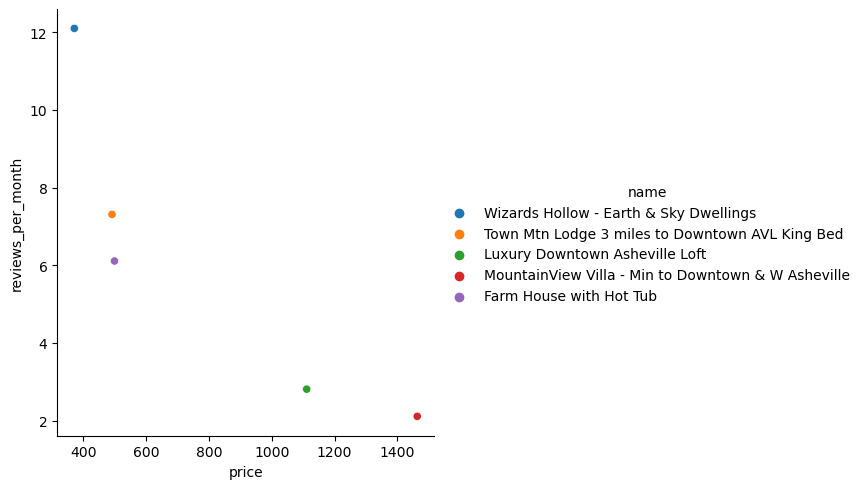

In [18]:
# let's now visualize some statistics about our top earners
sns.relplot(data=listings_df.loc[[33521140, 36958278, 30232435, 53092220, 48585236]], x="price", y="reviews_per_month", hue="name")

## Here is a photo of the top earning Airbnb in this dataset for those curious ![top_earner](https://a0.muscache.com/im/pictures/miso/Hosting-33521140/original/43f3038e-7843-4db5-bd30-a209d950c480.jpeg?im_w=720)
---------------------------------------------------------------------------------------------------------------- 
## A pretty obvious observation to make from the graph above is that as price increases, the number of stays decreases exponentially. More expensive = less people can afford to stay there.
## Another is that the two most expensive per night are close to downtown which makes sense as that is where the property is most expensive to buy in the region.

In [19]:
# I would now like to determine the most popular budget friendly stays. So, for this I will arbitrarily pick $100
# as my price limit. 
budget_stays = listings_df[listings_df["price"] < 100]
budget_stays = budget_stays[budget_stays["reviews_per_month"] > 0]
top_budg_stays = budget_stays.sort_values("reviews_per_month")[::-1]
top_budg_stays.head()

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
24605088,Sunflower Hotel Vibe Minutes Downtown+Biltmore,3028199,Florencia,NaN,28803,35.55934,-82.50724,Private room,69.0,1,873,2023-03-04,14.66,5,169,181,NaN
40274759,Pod at Sweet Peas Hostel,305248767,Sweet Peas,NaN,28801,35.59685,-82.55437,Shared room,43.0,1,523,2023-01-03,13.01,4,274,181,NaN
47091897,Big Red,231291927,Tiny House Farms,NaN,28806,35.63184,-82.62874,Entire home/apt,89.0,1,354,2023-03-15,12.95,13,362,162,NaN
44841713,"Pura Vida: Eco-Modern, Cozy and Central w/ HEPA",315904078,Kristy,NaN,28806,35.58413,-82.57702,Entire home/apt,96.0,1,386,2023-03-17,12.29,1,231,145,NaN
49232318,Cozy Comfy and Cute Asheville Tiny with HOT TUB,396620878,Christine,NaN,28806,35.57536,-82.63941,Entire home/apt,93.0,1,283,2023-03-12,12.11,4,363,141,NaN


## We can see from above that reviews_per_month is quite high for the group compared to our overall top earners, which supports our hypothesis that for the area, higher price and number of stays per month are inversly correlated.

In [20]:
# Again let's calculate our top earners and see what if anything they have in common
top_budg_earnings = top_budg_stays["price"] * top_budg_stays["reviews_per_month"] * 12
top_budg_earnings = top_budg_earnings.reset_index(name="earnings")
top_budg_earnings.sort_values("earnings")[::-1][:5]

,id,earnings
5,49171098,14172.84
3,44841713,14158.08
2,47091897,13830.60
4,49232318,13514.76
8,40639820,12614.40


In [21]:
top_budg_stays.loc[[49171098,44841713,47091897,49232318,40639820]]

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
49171098,West Asheville Mountain Bus with Hot tub,396620878,Christine,NaN,28806,35.57693,-82.64050,Entire home/apt,99.0,1,280,2023-03-13,11.93,4,364,120,NaN
44841713,"Pura Vida: Eco-Modern, Cozy and Central w/ HEPA",315904078,Kristy,NaN,28806,35.58413,-82.57702,Entire home/apt,96.0,1,386,2023-03-17,12.29,1,231,145,NaN
47091897,Big Red,231291927,Tiny House Farms,NaN,28806,35.63184,-82.62874,Entire home/apt,89.0,1,354,2023-03-15,12.95,13,362,162,NaN
49232318,Cozy Comfy and Cute Asheville Tiny with HOT TUB,396620878,Christine,NaN,28806,35.57536,-82.63941,Entire home/apt,93.0,1,283,2023-03-12,12.11,4,363,141,NaN
40639820,Urban Forest Suite - Perfect Couples Getaway,14604719,Mitchell,NaN,28806,35.57083,-82.59055,Entire home/apt,96.0,1,432,2023-02-19,10.95,1,28,78,NaN


## even more commonalities emerged on this data set.
   ### -All have the same area code
   ### -All are Entire Home/Apt rental room types
   ### -All are have a one night minimum stay
   ###    -All are available almost year round (again one is not, number 5 says it is only available 28 days a year so I will fix that. So, that it is not misrepresented later if we choose to use it as a training feature.)
   ###   -All average over 10 reviews_per_month

In [22]:
budget_stays.at[40639820, "availability_365"] = 132

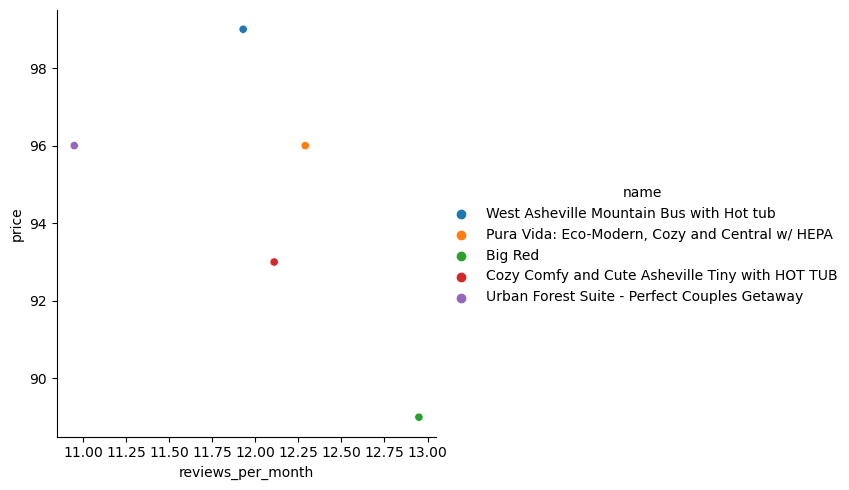

In [23]:
sns.relplot(data=top_budg_stays.loc[[49171098,44841713,47091897,49232318,40639820]], x="reviews_per_month", y="price", hue="name")

## Have a look at our top budget earner; it is drastically different from our top earner overall
![top_budg_earner](https://a0.muscache.com/im/pictures/miso/Hosting-49171098/original/45a54a27-3937-4c2e-b1e8-c098e5eeeef8.png?im_w=720)

# Further analysis
   ## As an economically minded person I would like to see things like the overall costs to buy, develop, and maintain the units to get a better sense of cash flow and time until the loan, or initial investment into the property is paid back. 
  ## Unfortunately, these statistics are not available in this dataset and are beyond the scope of what this project is ultimately for.

In [24]:
# Lastly let's try to implement a ML model using multiple features, namely neighborhood, price, availability_365, 
# and reviews_per_month to predict our top overall earners.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linear_model = LinearRegression()

# Let's also go ahead and add an "earnings" column to our OG dataframe so that we can verify our target array is correct
# and also use it to evaluate our prediction results later. 
listings_df["earnings"] = listings_df["price"]*listings_df["reviews_per_month"]*12

# preprocessing our data
data = listings_df[["neighborhood", "price", "availability_365","reviews_per_month"]].fillna(0).values
target = (listings_df["price"]*listings_df["reviews_per_month"]*12).reset_index(name="earnings").fillna(0)
target = target["earnings"].values

# splitting up data to get a more accurate test (I ran into quite a bit of trouble with train_test_split, so I just did this manually)
# something about the way it segmented the portions of data made the np arrays uneven. I didn't find a fix for
# this that I was comfortable implementing. 
train_data, train_target, test_data, test_target = data[:2150], target[:2150], data[2151:], target[2151:]

# fitting and scoring 
linear_model.fit(X=train_data, y=train_target)
print("Training Accuracy: ", linear_model.score(train_data,train_target))
print("Testing Accuracy: ", linear_model.score(test_data,test_target))

Training Accuracy:  0.6417722932332919
Testing Accuracy:  0.6811222428466679


## So, by this metric,  $if$ I have done this correctly........ and thats a big if, it shows that our model does not generalize well and that it is not very accurate. 

In [27]:
#Let's go ahead and take a look at our predicted earnings in our dataframe, and then calculate our accuracy a few
# alternate ways.
listings_df["predicted_earnings"] = linear_model.predict(data)
listings_df[:50]

,name,host_id,host_name,neighbourhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,earnings,predicted_earnings
id,,,,,,,,,,,,,,,,,,,
108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,100.0,30,92,2022-12-11,0.66,2,246,2,NaN,792.00,853.333465
155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,100.0,1,383,2023-03-12,2.70,6,197,26,NaN,3240.00,3839.307306
156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.578640,-82.595780,Private room,66.0,1,67,2020-01-01,0.48,6,0,0,NaN,380.16,-387.117606
197263,Tranquil Room & Private Bath,961396,Timo,NaN,28806,35.578080,-82.636890,Private room,45.0,2,66,2022-11-21,0.51,2,88,24,NaN,275.40,-365.334188
209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.618560,-82.552760,Entire home/apt,100.0,30,60,2022-10-31,0.43,1,231,2,NaN,516.00,476.733284
246315,Asheville Dreamer's Cabin,1292070,Annie,NaN,28805,35.596350,-82.506550,Private room,68.0,7,57,2019-10-30,0.41,3,76,0,NaN,334.56,-288.819692
259576,"Private, peaceful, and free goat therapy",1362726,Julia,NaN,28805,35.619290,-82.481140,Entire home/apt,73.0,2,766,2023-03-17,5.57,2,49,112,NaN,4879.32,7520.735691
304379,Refocus Cottage - paradise,1566145,Gayle,NaN,28804,35.644530,-82.525860,Entire home/apt,289.0,30,24,2019-08-03,0.18,2,243,0,NaN,624.24,2263.171449
353092,Athena's Loft: Find yourself here!,1788071,Beth,NaN,28806,35.582170,-82.599970,Entire home/apt,69.0,2,529,2023-01-01,4.54,1,141,14,NaN,3759.12,6140.996097


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# somehow a few of the earnings, and/or predicted_earnings became NaN and I had to remove them to calculate a score
listings_df = listings_df.dropna(subset=["earnings", "predicted_earnings"])
print("MSE:", mean_squared_error(listings_df["earnings"].values, listings_df["predicted_earnings"].values))
print("r^2 score: ", r2_score(listings_df["earnings"].values, listings_df["predicted_earnings"].values))

MSE: 6600871.197180767
r^2 score:  0.6651339960510014


## Again these metrics show that our model is not very accurate.
## possible improvements: 
   - Use something other than linear modeling.
   - Figure out a way to use the appropriate train_test_split method instead of splitting it manually
   - Better handle the NaN values
   - Model with very minimal features to start and build from there to see if more is actually better or if we can model it accurately with less
